In [13]:
%matplotlib inline
import pandas as pd
from IPython.display import display
import matplotlib
#matplotlib.use('pgf')
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sqlite3


sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] =(20,10)
pd.options.display.max_rows = 2000
plt.rcParams['mathtext.fontset'] = 'cm'
#plt.rcParams['font.family'] = 'cmu serif'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

sns.set_context('paper', font_scale=2)

conn = sqlite3.connect("../demo-db.sqlite")

In [40]:
def get_pareto_frontier(df, x, y, split):
    # removes all rows that don't lie on the pareto frontier
    to_plot = df.sort_values(y,ascending=False).reset_index(drop=True)
    d = {} # store last x values
    drop_list = []
    for algo in set(df[split]):
        d[algo] = 0
    for i in range(len(to_plot)):
        x_ = to_plot.iloc[i][x]
        y_ = to_plot.iloc[i][y]
        algo = to_plot.iloc[i][split]
        if x_ > d[algo]:
            d[algo] = x_
        else:
            drop_list.append(i)
    to_plot.drop(drop_list, inplace=True)
        
    return to_plot

In [2]:
df = pd.read_sql_query("select * from results;", conn);

In [3]:
df.head()

,sha,git_rev,hostname,date,dataset,dataset_version,algorithm,algorithm_version,parameters,running_time_ns,seed,experiment_file,recall
0,020d558bf681198463e89db44ba01b9ced93c26b931800...,*,mac610540,2020-06-16T12:23:44.049167,glove-100-angular,1,bruteforce,4,method=simple;storage=i16_aligned;filter=true;...,1026914600,4132,not provided,0.81
1,10649dc3f1aed5e84ac8d72bb7508a17b51b74eef2765a...,*,mac610540,2020-06-16T12:21:35.143991,glove-100-angular,1,bruteforce,4,method=avx2;storage=float_aligned;filter=true;...,1264950300,4132,not provided,0.59
2,238b8fc2d88c2b9e737ba4b947562e1036c89e52f2719b...,*,mac610540,2020-06-16T12:19:59.357438,glove-100-angular,1,bruteforce,4,method=simple;storage=float_aligned;filter=tru...,1989376300,4132,not provided,0.97
3,396d914d203c22e4ef0695a044f639bb23074f2b440c04...,*,mac610540,2020-06-16T12:24:16.245531,glove-100-angular,1,bruteforce,4,method=simple;storage=i16_aligned;filter=true;...,2184580900,4132,not provided,0.96
4,435668baab5e4bb4028b725d7a76cb8f636259f2bfcf34...,*,mac610540,2020-06-16T12:23:30.194197,glove-100-angular,1,bruteforce,4,method=simple;storage=i16_aligned;filter=true;...,601162700,4132,not provided,0.85


In [4]:
p = r'method=(?P<method>\w*);storage=(?P<storage>\w*);(filter=(?P<filter>\w*);recall=(?P<recall_wish>[\d.]*).*)?'

df[['method', 'storage', 'filter', 'recall_wish']] = df.parameters.str.extract(p, expand=True)[['method', 'storage', 'filter', 'recall_wish']]

[]

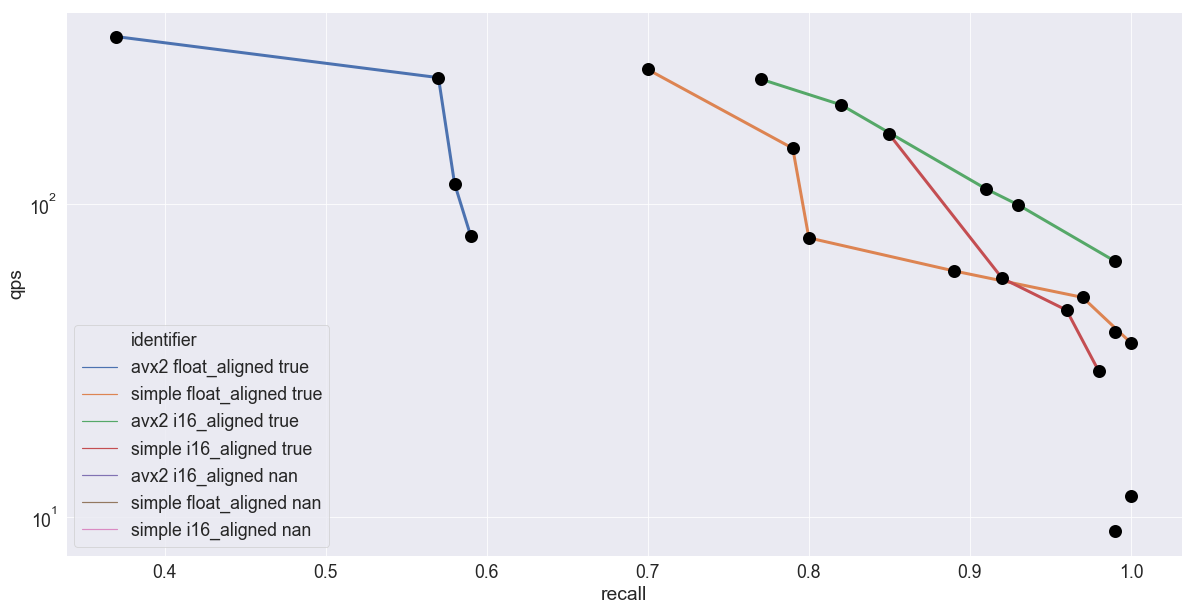

In [46]:
df["qps"] = df.apply(lambda row: 1 / ((row["running_time_ns"] / 100.0) / 1e9), axis=1 )
df["identifier"] = df.apply(lambda row: row["method"] + " " + row["storage"] + " " + str(row["filter"]), axis=1)

g = sns.lineplot(data=get_pareto_frontier(df, 'recall', 'qps', 'identifier'), x='recall', y='qps', hue='identifier', markers=True, dashes=False,
                 marker='o', ms=10, mew=3, lw=3, color='black', markeredgecolor='black', markerfacecolor="black", legend="full", err_style=None)
g.semilogy()

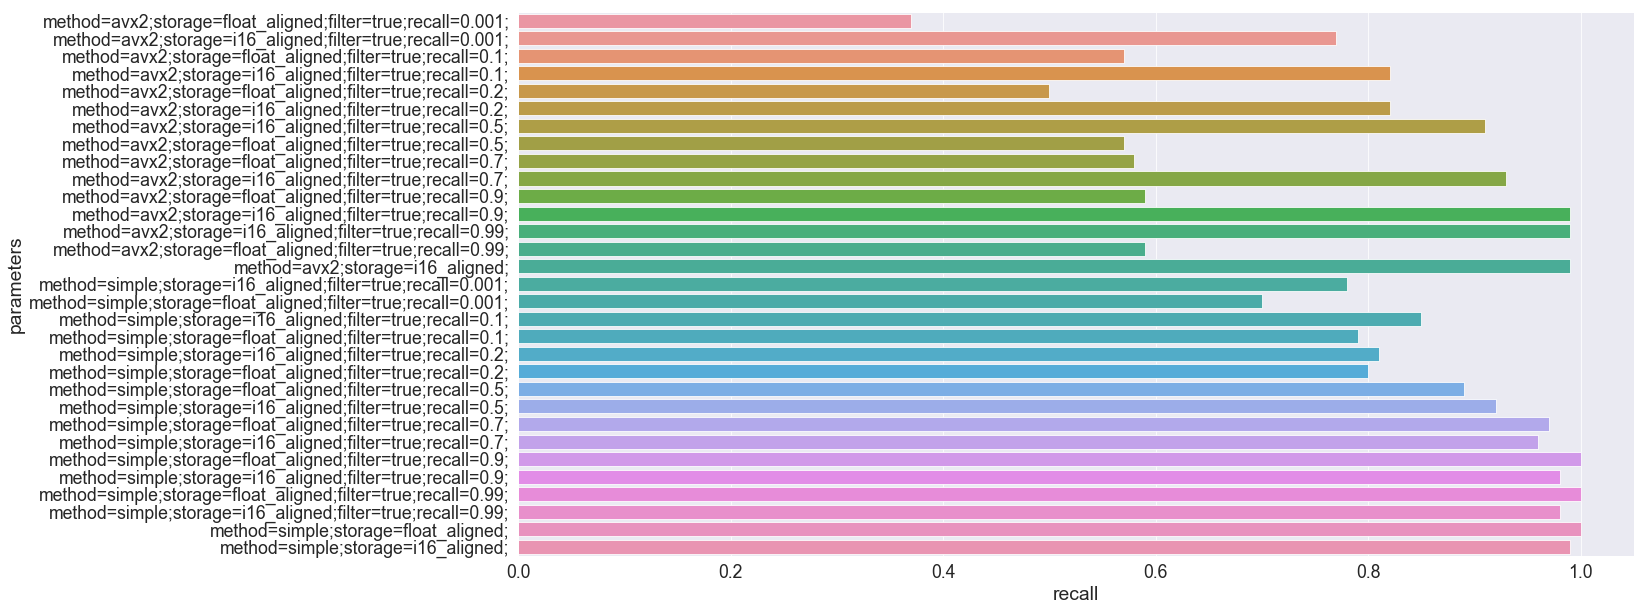

In [63]:
sns.barplot(data=df.sort_values(['method', 'recall_wish']), y='parameters', x='recall')

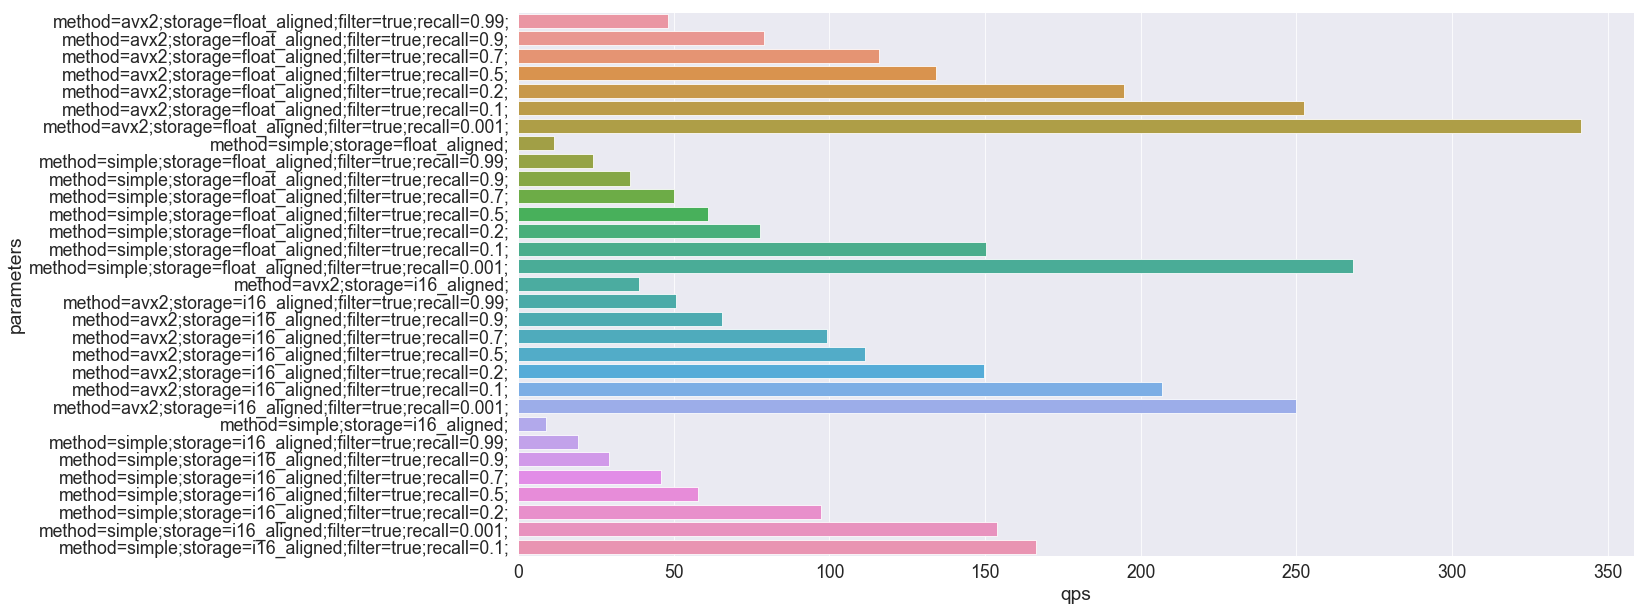

In [61]:
sns.barplot(data=df.sort_values(['storage', 'method', 'qps']), y='parameters', x='qps')